## Klasifikacija malignog i benignog raka dojke koristeći algoritme strojnog učenja $\newline$- poboljšanje rezultata

Rad je preuzet s poveznice: https://ieeexplore.ieee.org/document/9445249

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Za razliku od originalne analize, svaka je metoda strojnog učenja **ponovljena N=10 puta** kako bi se usrednjila dobivena vrijednost i dobili pouzdaniji rezultati.

Osim toga, analize su isprobane na **cijelom skupu** podataka i na **reduciranom skupu** u kojemu su izbačene stršeće vrijednosti (gledajući zasebno svaku klasu).

In [2]:
N=10

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


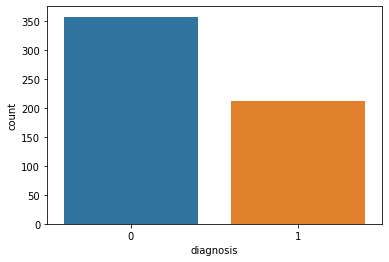

0    357
1    212
Name: diagnosis, dtype: int64


In [3]:
df = pd.read_csv('data_sanitized.csv')
sns.countplot(df['diagnosis'], label='count')
plt.show()
print(df['diagnosis'].value_counts())

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


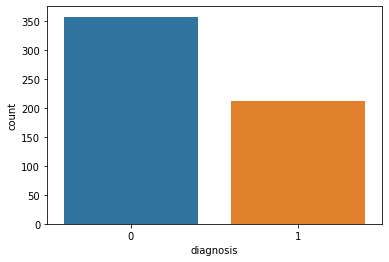

0    357
1    212
Name: diagnosis, dtype: int64


In [4]:
df = pd.read_csv('data_sanitized.csv')
sns.countplot(df['diagnosis'], label='count')
plt.show()
print(df['diagnosis'].value_counts())

Za početak **nijedan atribut nije izbačen** s obzirom na to da koeficijent korelacije iskazuje samo linearnu korelaciju, stoga njegova vrijednost blizu nuli ne indicira nužno nepostojanje korelacije. Također, trenutno korištene metode strojnog učenja rade dovoljno brzo i sa svim atributima.

In [5]:
print("# of columns:", len(df.columns.values))
print(df.columns.values)


# of columns: 31
['diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave_points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave_points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave_points_worst' 'symmetry_worst' 'fractal_dimension_worst']


Također, skup podataka je **pri svakoj iteraciji** nasumično podijeljen u skup za treniranje i skup za testiranje u omjeru 3:1

In [6]:
#split df into train and test
from sklearn.model_selection import train_test_split
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
testSize = 0.25 #ubaciti svugdje

Sada ćemo redom isprobati navedene algoritme strojnog učenja, zabilježiti njihove preciznosti i naposljetku ih skupno prikazati.

### Logistička regresija

In [7]:
# logistic regression
from sklearn.linear_model import LogisticRegression
trainAccs, testAccs = [], []
for i in range(N):
  print(".", end="")
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
  logisticRegr = LogisticRegression(max_iter=100000)
  logisticRegr.fit(X_train, y_train)
  LRaccTrain = logisticRegr.score(X_train, y_train)
  LRaccTest = logisticRegr.score(X_test, y_test)
  trainAccs.append(LRaccTrain)
  testAccs.append(LRaccTest)
print()
LRaccTrain = sum(trainAccs)/len(trainAccs)
LRaccTest = sum(testAccs)/len(testAccs)
print("Average accuracy on training set:", LRaccTrain)
print("Average accuracy on test set:", LRaccTest)

..........
Average accuracy on training set: 0.9591549295774648
Average accuracy on test set: 0.9573426573426573


### K-Najbližih susjeda (KNN)

In [8]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier

trainAccs, testAccs = [], []
ks = []
for i in range(N):
    print(".", end="")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    maxAccTrain = 0
    maxAccTest = 0
    maxk = 0
    for k in range(1, 30):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        KNNaccTrain = knn.score(X_train, y_train)
        KNNaccTest = knn.score(X_test, y_test)
        if(KNNaccTest > maxAccTest):
            maxAccTest = KNNaccTest
            maxAccTrain = KNNaccTrain
            maxk = k
    trainAccs.append(maxAccTrain)
    testAccs.append(maxAccTest)
    ks.append(maxk)
print()
KNNaccTrain = sum(trainAccs)/len(trainAccs)
KNNaccTest = sum(testAccs)/len(testAccs)
print("Average accuracy on training set:", KNNaccTrain)
print("Average accuracy on test set:", KNNaccTest)
#print the summary of ks
print("Summary of k values: (k - count)")
print(pd.Series(ks).value_counts())

..........
Average accuracy on training set: 0.9401408450704224
Average accuracy on test set: 0.9482517482517482
Summary of k values: (k - count)
2     2
9     2
4     2
12    1
5     1
7     1
8     1
dtype: int64


### Stablo odluke

In [9]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

trainAccs, testAccs = [], []
for i in range(N):
  print(".", end="")
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

  tree = DecisionTreeClassifier()
  tree.fit(X_train, y_train)
  treeAccTrain = tree.score(X_train, y_train)
  treeAccTest = tree.score(X_test, y_test)

  trainAccs.append(treeAccTrain)
  testAccs.append(treeAccTest)
print()
treeAccTrain = sum(trainAccs)/len(trainAccs)
treeAccTest = sum(testAccs)/len(testAccs)
print("Average accuracy on training set:", treeAccTrain)
print("Average accuracy on test set:", treeAccTest)


..........
Average accuracy on training set: 1.0
Average accuracy on test set: 0.9293706293706295


### Stablo odluke - podrezivanje

In [10]:

trainAccs, testAccs = [], []
depths = []
for i in range(N):
  print(".", end="")
  maxAccTrain = 0
  maxAccTest = 0
  for depth in range(1, 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    ##prune the tree
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, y_train)
    
    pruneTreeAccTrain = tree.score(X_train, y_train)
    pruneTreeAccTest = tree.score(X_test, y_test)

    if(pruneTreeAccTest > maxAccTest):
      maxAccTest = pruneTreeAccTest
      maxAccTrain = pruneTreeAccTrain
      maxDepth = depth
  trainAccs.append(maxAccTrain)
  testAccs.append(maxAccTest)
  depths.append(maxDepth)

print()
pruneTreeAccTrain = sum(trainAccs)/len(trainAccs)
pruneTreeAccTest = sum(testAccs)/len(testAccs)
print("Average accuracy on training set:", pruneTreeAccTrain)
print("Average accuracy on test set:", pruneTreeAccTest)
#print the summary of depths
print("Summary of depth values: (depth - count)")
print(pd.Series(depths).value_counts())

..........
Average accuracy on training set: 0.9875586854460094
Average accuracy on test set: 0.9538461538461538
Summary of depth values: (depth - count)
5    4
3    3
9    1
7    1
4    1
dtype: int64


### Naivni Bayesov klasifikator

In [11]:
#naive bayes
from sklearn.naive_bayes import GaussianNB

trainAccs, testAccs = [], []
for i in range(N):
  print(".", end="")
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

  nb = GaussianNB()
  nb.fit(X_train, y_train)
  nbAccTrain = nb.score(X_train, y_train)
  nbAccTest = nb.score(X_test, y_test)

  trainAccs.append(nbAccTrain)
  testAccs.append(nbAccTest)
print()
nbAccTrain = sum(trainAccs)/len(trainAccs)
nbAccTest = sum(testAccs)/len(testAccs)
print("Average accuracy on training set:", nbAccTrain)
print("Average accuracy on test set:", nbAccTest)

..........
Average accuracy on training set: 0.943192488262911
Average accuracy on test set: 0.941958041958042


### Slučajna šuma

In [12]:
#random forest
from sklearn.ensemble import RandomForestClassifier

trainAccs, testAccs = [], []
for i in range(N):
  print(".", end="")
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

  rf = RandomForestClassifier()
  rf.fit(X_train, y_train)
  rfAccTrain = rf.score(X_train, y_train)
  rfAccTest = rf.score(X_test, y_test)

  trainAccs.append(rfAccTrain)
  testAccs.append(rfAccTest)
print()
rfAccTrain = sum(trainAccs)/len(trainAccs)
rfAccTest = sum(testAccs)/len(testAccs)
print("Average accuracy on training set:", rfAccTrain)
print("Average accuracy on test set:", rfAccTest)

..........
Average accuracy on training set: 1.0
Average accuracy on test set: 0.9671328671328672


### Slučajna šuma - podrezivanje

In [13]:

trainAccs, testAccs = [], []
depths = []
for i in range(N):
  print(".", end="")
  maxAccTrain = 0
  maxAccTest = 0
  for depth in range(1, 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    ##prune the tree
    rf = RandomForestClassifier(max_depth=depth)
    rf.fit(X_train, y_train)
    
    rfPrunedAccTrain = rf.score(X_train, y_train)
    rfPrunedAccTest = rf.score(X_test, y_test)

    if(rfPrunedAccTest > maxAccTest):
      maxAccTest = rfPrunedAccTest
      maxAccTrain = rfPrunedAccTrain
      maxDepth = depth
  trainAccs.append(maxAccTrain)
  testAccs.append(maxAccTest)
  depths.append(maxDepth)

print()
rfPrunedAccTrain = sum(trainAccs)/len(trainAccs)
rfPrunedAccTest = sum(testAccs)/len(testAccs)
print("Average accuracy on training set:", rfPrunedAccTrain)
print("Average accuracy on test set:", rfPrunedAccTest)
#print the summary of depths
print("Summary of depth values: (depth - count)")
print(pd.Series(depths).value_counts())

..........
Average accuracy on training set: 0.9971830985915492
Average accuracy on test set: 0.979020979020979
Summary of depth values: (depth - count)
6    3
7    3
9    2
8    1
3    1
dtype: int64


### Stroj potpornih vektora

In [14]:
# SVM
from sklearn.svm import SVC

methodsAccArrays = {'linear': ([], [], []), 'poly': (
    [], [], []), 'rbf': ([], [], []), 'sigmoid': ([], [], [])}

for i in range(N):
    print(".", end="")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    methodsAccLocal = {'linear': ([], [], []), 'poly': (
        [], [], []), 'rbf': ([], [], []), 'sigmoid': ([], [], [])}
    for method in methodsAccLocal.keys():
        print(",", end="")
        c = -15
        improving = 2
        while (c < 4 or improving > 0):
            improving -= 1
            svm = SVC(kernel=method, C=10**c)
            svm.fit(X_train, y_train)
            SVMaccTrain = svm.score(X_train, y_train)
            SVMaccTest = svm.score(X_test, y_test)
            if (len(methodsAccLocal[method][2]) == 0 or SVMaccTest > max(methodsAccLocal[method][2])):
                methodsAccLocal[method][0].append(c)
                methodsAccLocal[method][1].append(SVMaccTrain)
                methodsAccLocal[method][2].append(SVMaccTest)
                improving = 2
            c += 1
    for method in methodsAccLocal.keys():
        indexOfBest = methodsAccLocal[method][2].index(
            max(methodsAccLocal[method][2]))

        methodsAccArrays[method][0].append(
            methodsAccLocal[method][0][indexOfBest])
        methodsAccArrays[method][1].append(
            methodsAccLocal[method][1][indexOfBest])
        methodsAccArrays[method][2].append(
            methodsAccLocal[method][2][indexOfBest])
            
methodsAcc = {'linear': (0, 0), 'poly': (
    0, 0), 'rbf': (0, 0), 'sigmoid': (0, 0)}

# find average of all the best values
for method in methodsAccArrays.keys():
    methodsAcc[method] = (sum(methodsAccArrays[method][1])/len(
        methodsAccArrays[method][1]), sum(methodsAccArrays[method][2])/len(methodsAccArrays[method][2]))

    print(
        f"Average accuracy on training set (method={method}):", methodsAcc[method][0])
    print(
        f"Average accuracy on test set (method={method}):", methodsAcc[method][1])
    print("Summary of C values: (C - count)")
    print(pd.Series(methodsAccArrays[method][0]).value_counts(ascending=True))
    print()

bestAccMethod = None
for method in methodsAcc.keys():
    if (bestAccMethod == None or methodsAcc[method][1] > methodsAcc[bestAccMethod][1]):
        bestAccMethod = method
SVMbestAccs = (methodsAcc[bestAccMethod][0], methodsAcc[bestAccMethod][1])

.,,,,.,,,,.,,,,.,,,,.,,,,.,,,,.,,,,.,,,,.,,,,.,,,,Average accuracy on training set (method=linear): 0.9629107981220658
Average accuracy on test set (method=linear): 0.9594405594405595
Summary of C values: (C - count)
 1    1
-1    1
-2    2
 3    2
 2    2
 0    2
dtype: int64

Average accuracy on training set (method=poly): 0.9408450704225352
Average accuracy on test set (method=poly): 0.9426573426573427
Summary of C values: (C - count)
1    1
2    1
6    2
4    3
0    3
dtype: int64

Average accuracy on training set (method=rbf): 0.9488262910798124
Average accuracy on test set (method=rbf): 0.9503496503496504
Summary of C values: (C - count)
 0    1
 1    1
 5    1
 4    1
-1    1
 6    1
 3    4
dtype: int64

Average accuracy on training set (method=sigmoid): 0.6284037558685446
Average accuracy on test set (method=sigmoid): 0.6244755244755245
Summary of C values: (C - count)
-15    10
dtype: int64



### Usporedba rezultata
Nakon treniranja algoritama, dobiveni su sljedeći rezultati:

In [15]:
# make an aligned markdown table with all the accuracies
from tabulate import tabulate
table = [['Logistic Regression', LRaccTrain, LRaccTest]
, ['KNN', maxAccTrain, maxAccTest]
, ['Decision Tree', treeAccTrain, treeAccTest]
, ['Decision Tree (pruned)', pruneTreeAccTrain, pruneTreeAccTest]
, ['Naive Bayes', nbAccTrain, nbAccTest]
, ['Random Forest', rfAccTrain, rfAccTest]
, ['Random Forest (pruned)', rfPrunedAccTrain, rfPrunedAccTest]
, ['SVM', SVMbestAccs[0], SVMbestAccs[1]]]
print(tabulate(table, headers=['Classifier',
      'Training Accuracy', 'Test Accuracy']))


Classifier                Training Accuracy    Test Accuracy
----------------------  -------------------  ---------------
Logistic Regression                0.959155         0.957343
KNN                                1                0.979021
Decision Tree                      1                0.929371
Decision Tree (pruned)             0.987559         0.953846
Naive Bayes                        0.943192         0.941958
Random Forest                      1                0.967133
Random Forest (pruned)             0.997183         0.979021
SVM                                0.962911         0.959441


Rezultati dobiveni u referentnom radu su:

![](accuracy_table.png)

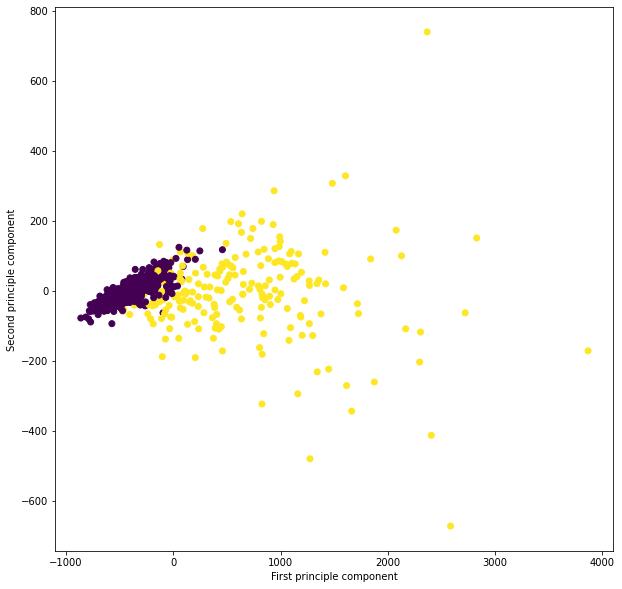

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca.fit(df)

x_pca = pca.transform(df)

plt.figure(figsize=(10, 10))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df['diagnosis'])
plt.xlabel("First principle component")
plt.ylabel("Second principle component")
plt.show()

In [25]:
from sklearn.cluster import KMeans
def optimize_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

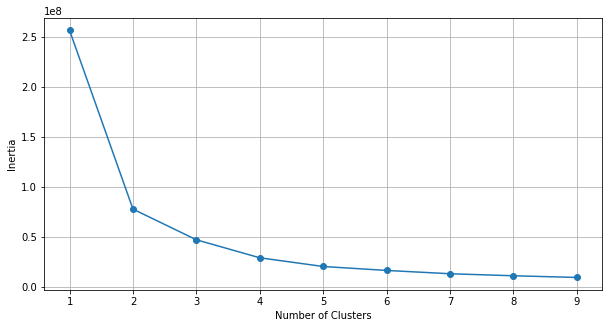

In [26]:
optimize_k_means(x_pca, 10)

Text(0.5, 1.0, 'Predicted clusters using KMeans')

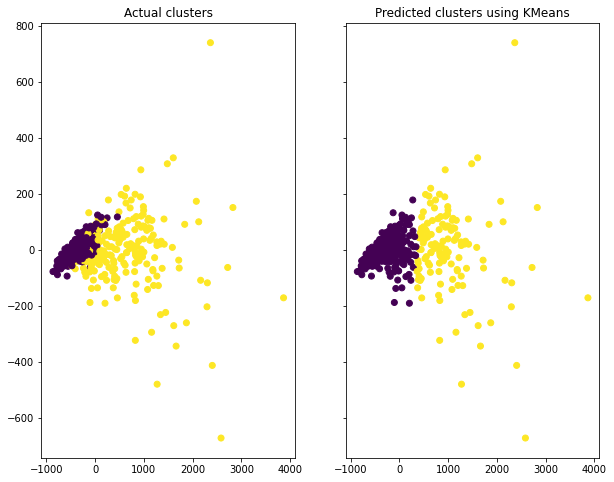

In [34]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x_pca)
labels = kmeans.labels_

f, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (10, 8))

ax1.scatter(x = x_pca[:,0], y = x_pca[:,1], c = df['diagnosis'])
ax2.scatter(x = x_pca[:,0], y = x_pca[:,1], c = labels)
ax1.set_title("Actual clusters")
ax2.set_title("Predicted clusters using KMeans")